# A1

In [5]:
import matplotlib.pyplot as plt
from BSE import market_session, populate_market

def setup_demand_supply_schedule(start_time, end_time):
    supply_schedule = [{'from': start_time, 'to': end_time, 'ranges': [(50, 150)], 'stepmode': 'fixed'}]
    demand_schedule = [{'from': start_time, 'to': end_time, 'ranges': [(50, 150)], 'stepmode': 'fixed'}]

    return supply_schedule, demand_schedule

def configure_market():
    start_time = 0.0
    end_time = 60.0 * 60.0 * 24  # 1 day in seconds
    n_shvr = 20  # Number of SHVR agents for both buyers and sellers

    
    buyers_spec = [('SHVR', n_shvr)]
    sellers_spec = [('SHVR', n_shvr)]
    traders_spec = {'sellers': sellers_spec, 'buyers': buyers_spec}

    supply_schedule, demand_schedule = setup_demand_supply_schedule(start_time, end_time)
    order_sched = {'sup': supply_schedule, 'dem': demand_schedule, 'interval': 15, 'timemode': 'drip-poisson'}

    return traders_spec, order_sched, start_time, end_time

def run_shvr_market():
    trial_id = "shvr_market"
    traders_spec, order_sched, start_time, end_time = configure_market()
    
    dump_flags = {'dump_blotters': False, 'dump_lobs': False, 'dump_strats': False, 'dump_avgbals': False, 'dump_tape': True}

    market_session(trial_id, start_time, end_time, traders_spec, order_sched, dump_flags, False)

    return trial_id


trial_id = run_shvr_market()

In [7]:
import pandas as pd


def extract_data_from_tape(tape_file):
    data = []
    with open(tape_file, 'r') as file:
        for line in file:
            if line.startswith('Trd'):
                _, time, price = line.split(', ')
            
                data.append((float(time), float(price.strip())))
    return data


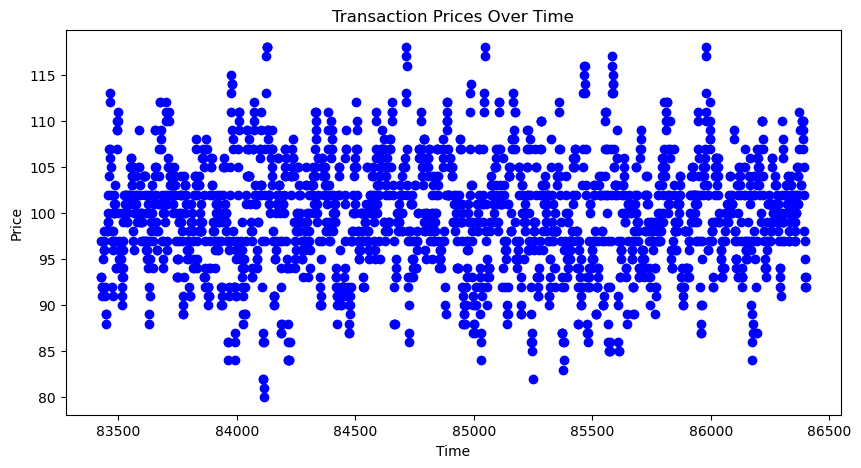

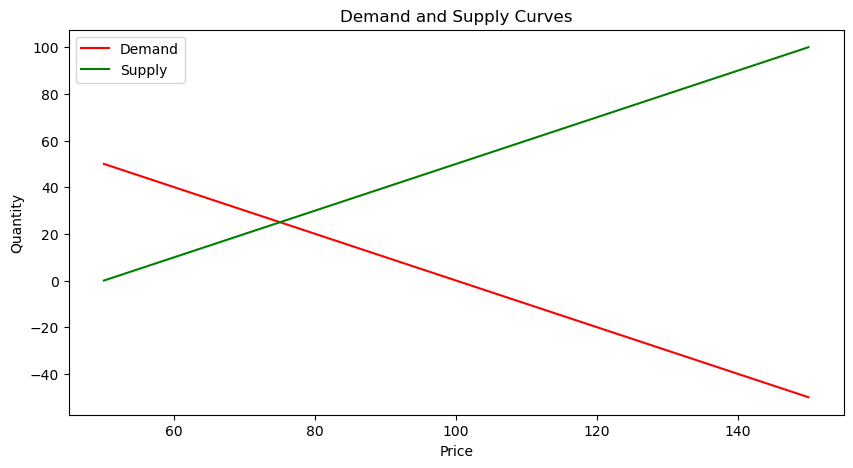

In [8]:
tape_file = f"{trial_id}_tape.csv"
data = extract_data_from_tape(tape_file)

times = [x[0] for x in data]
prices = [x[1] for x in data]


plot_transaction_prices(prices, times)
plot_demand_supply_curve()


# Explation

The market simulation using only SHVR trading agents reveals distinct differences from Vernon Smith's findings, where human participants generally drove markets towards equilibrium. In this configuration, the SHVR agents, with their simplistic strategy of adjusting bid/ask prices based on recent transactions, lead to price fluctuations without a strong convergence to a single equilibrium price. The scatter plot of transaction prices over time demonstrates a dense but dispersed range, indicative of high trading activity with prices fluctuating around a central range. The linear demand and supply curves, while intersecting to indicate a theoretical equilibrium, are not sufficient for the SHVR agents to stabilize the market, resulting in a persistent spread in transaction prices. This outcome underscores the limitations of the SHVR agents in achieving the efficiency typically observed in markets with human traders, as their fixed logic prevents the market from smoothly converging to equilibrium, as illustrated in the generated graphs.

# A2

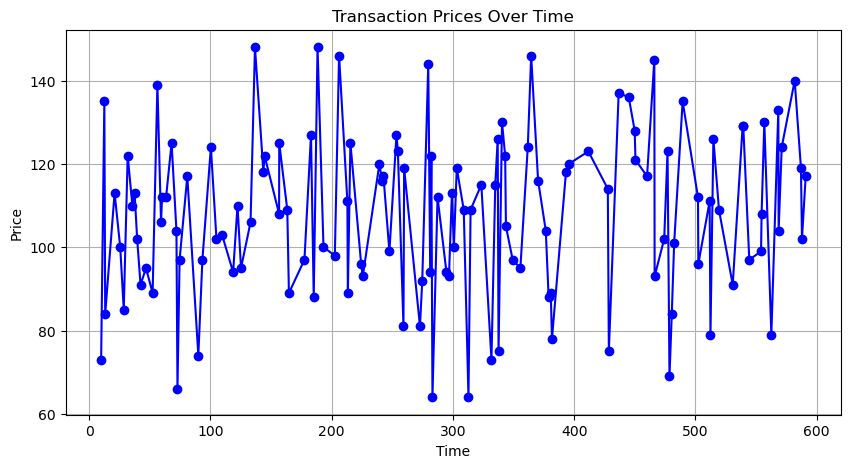

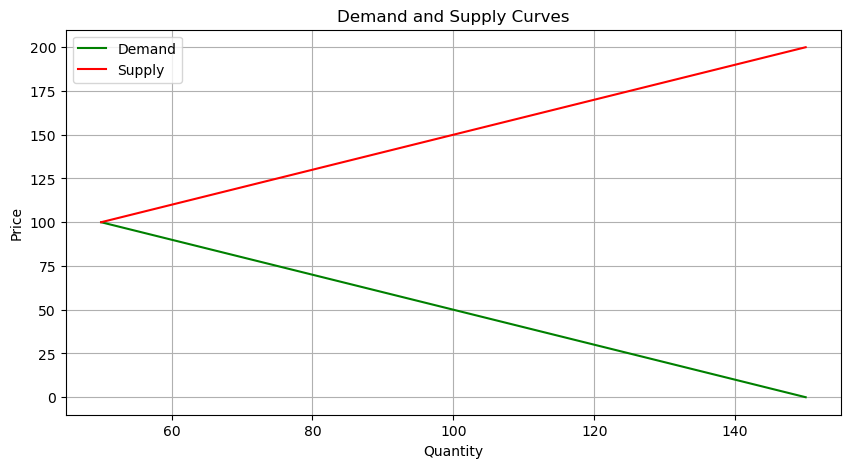

In [10]:
import os
import matplotlib.pyplot as plt


start_time = 0.0 
end_time = 600.0 

def run_zic_market():

    trial_id = 'zic_market'
    buyers_spec = [('ZIC', 10)]
    sellers_spec = [('ZIC', 10)]
    traders_spec = {'sellers': sellers_spec, 'buyers': buyers_spec}


    range1 = (50, 150)
    supply_schedule = [{'from': start_time, 'to': end_time, 'ranges': [range1], 'stepmode': 'fixed'}]
    range2 = (50, 150)
    demand_schedule = [{'from': start_time, 'to': end_time, 'ranges': [range2], 'stepmode': 'fixed'}]
    order_interval = 15

    order_sched = {'sup': supply_schedule, 'dem': demand_schedule,
                   'interval': order_interval, 'timemode': 'drip-poisson'}

    dump_flags = {'dump_blotters': False, 'dump_lobs': False, 'dump_strats': False,
                  'dump_avgbals': False, 'dump_tape': True}


    market_session(trial_id, start_time, end_time, traders_spec, order_sched, dump_flags, False)
    
    return trial_id


def extract_data_from_tape(tape_file):
    data = []
    with open(tape_file, 'r') as file:
        for line in file:
            if line.startswith('Trd'):
                _, time, price = line.split(', ')
                data.append((float(time), float(price.strip())))
    return data


def plot_transaction_prices(prices, times):
    plt.figure(figsize=(10, 5))
    plt.plot(times, prices, marker='o', linestyle='-', color='blue')
    plt.title('Transaction Prices Over Time')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()


def plot_demand_supply_curve():
    plt.figure(figsize=(10, 5))
    quantity = list(range(50, 151))
    demand = [150 - q for q in quantity]
    supply = [50 + q for q in quantity]
    plt.plot(quantity, demand, label='Demand', linestyle='-', color='green')
    plt.plot(quantity, supply, label='Supply', linestyle='-', color='red')
    plt.title('Demand and Supply Curves')
    plt.xlabel('Quantity')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()


trial_id = run_zic_market()


tape_file = f"{trial_id}_tape.csv"
data = extract_data_from_tape(tape_file)

times = [x[0] for x in data]
prices = [x[1] for x in data]


plot_transaction_prices(prices, times)
plot_demand_supply_curve()

The market simulation involving ZIC agents starkly contrasts with Vernon Smith's findings, where human participants often drove markets towards equilibrium despite limited information and bounded rationality. Unlike human traders, ZIC agents trade based on random or constrained pricing rules without any strategic behavior, leading to significant price fluctuations with no clear convergence to an equilibrium price. The "Transaction Prices Over Time" line plot vividly demonstrates this chaotic behavior, where prices scatter unpredictably due to the agents' inability to adapt to market conditions. The linear demand and supply curves intersect at an equilibrium price, but the ZIC agents' random behavior prevents the market from stabilizing, resulting in persistent noise and lack of order. This outcome highlights the fundamental differences between markets driven by simplistic agents like ZIC and those with more strategic participants, as seen in Smith's experiments, where even minimal strategic thinking can lead to price convergence. The graphs generated offer clear visual evidence of the disorganized price movements characteristic of a market dominated by ZIC agents, underscoring the contrast to the more orderly behavior observed in human-driven markets.

# A3

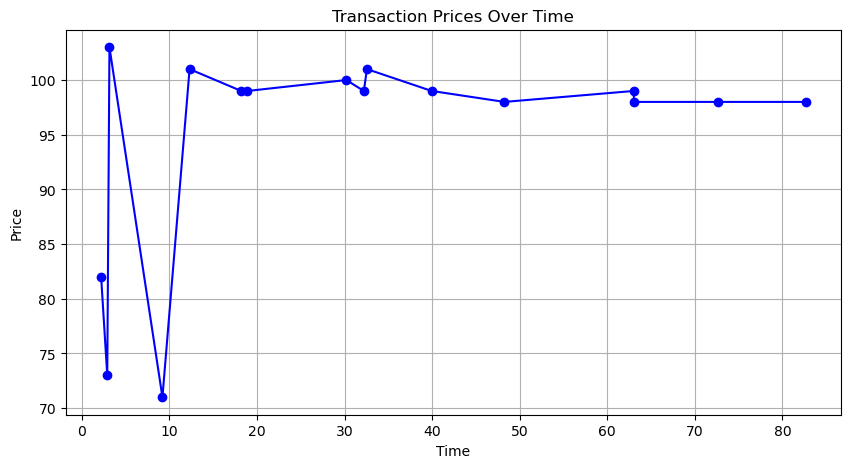

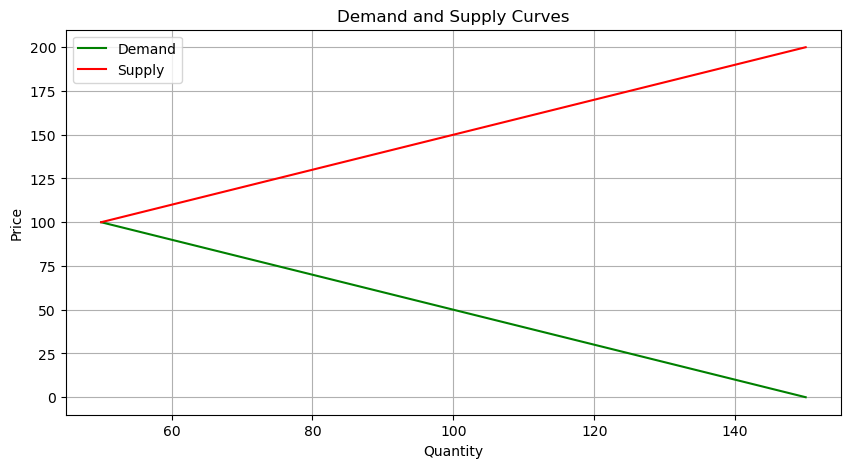

In [11]:
import os
import matplotlib.pyplot as plt


start_time = 0.0  
end_time = 600.0  


def run_zip_market():

    trial_id = 'zip_market'
    buyers_spec = [('ZIP', 10)]
    sellers_spec = [('ZIP', 10)]
    traders_spec = {'sellers': sellers_spec, 'buyers': buyers_spec}


    range1 = (50, 150)
    supply_schedule = [{'from': start_time, 'to': end_time, 'ranges': [range1], 'stepmode': 'fixed'}]
    range2 = (50, 150)
    demand_schedule = [{'from': start_time, 'to': end_time, 'ranges': [range2], 'stepmode': 'fixed'}]
    order_interval = 15

    order_sched = {'sup': supply_schedule, 'dem': demand_schedule,
                   'interval': order_interval, 'timemode': 'drip-poisson'}

    dump_flags = {'dump_blotters': False, 'dump_lobs': False, 'dump_strats': False,
                  'dump_avgbals': False, 'dump_tape': True}


    market_session(trial_id, start_time, end_time, traders_spec, order_sched, dump_flags, False)
    
    return trial_id


def extract_data_from_tape(tape_file):
    data = []
    with open(tape_file, 'r') as file:
        for line in file:
            if line.startswith('Trd'):
                _, time, price = line.split(', ')
                data.append((float(time), float(price.strip())))
    return data


def plot_transaction_prices(prices, times):
    plt.figure(figsize=(10, 5))
    plt.plot(times, prices, marker='o', linestyle='-', color='blue')
    plt.title('Transaction Prices Over Time')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()


def plot_demand_supply_curve():
    plt.figure(figsize=(10, 5))
    quantity = list(range(50, 151))
    demand = [150 - q for q in quantity]
    supply = [50 + q for q in quantity]
    plt.plot(quantity, demand, label='Demand', linestyle='-', color='green')
    plt.plot(quantity, supply, label='Supply', linestyle='-', color='red')
    plt.title('Demand and Supply Curves')
    plt.xlabel('Quantity')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()


trial_id = run_zip_market()


tape_file = f"{trial_id}_tape.csv"
data = extract_data_from_tape(tape_file)

times = [x[0] for x in data]
prices = [x[1] for x in data]


plot_transaction_prices(prices, times)
plot_demand_supply_curve()

The market simulation using ZIP agents demonstrates a clear trend towards price convergence, closely mirroring the behavior observed in Vernon Smith's experiments where human participants drive markets towards equilibrium. Unlike ZIC agents, ZIP agents possess adaptive strategies that allow them to adjust their pricing based on market conditions, resulting in a stabilization of transaction prices over time. The "Transaction Prices Over Time" graph shows initial fluctuations as the ZIP agents refine their strategies, ultimately converging to a stable price level that aligns with the intersection of the linear demand and supply curves, reflecting the market's equilibrium price. This quick convergence is a direct outcome of the ZIP agents' learning algorithms, enabling them to make progressively better pricing decisions as the session progresses. The generated graphs vividly illustrate this adaptive behavior, offering a closer approximation to the equilibrium pricing dynamics observed in human-driven markets, thereby contrasting sharply with the chaotic price movements seen with ZIC agents.

# A4

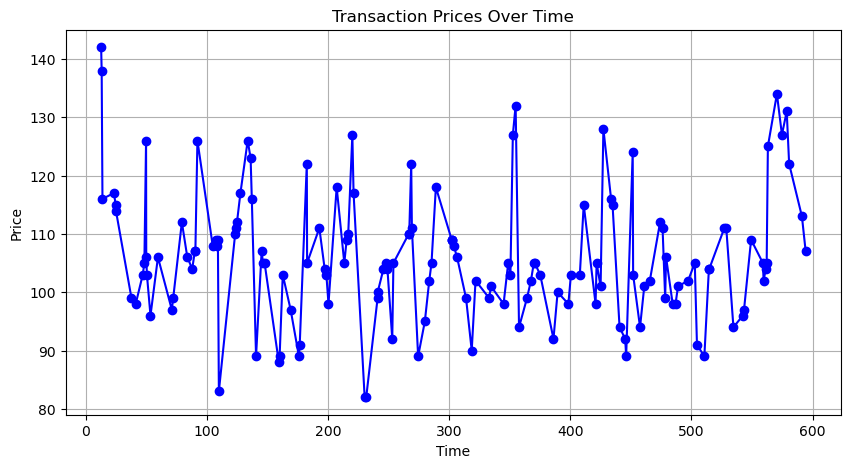

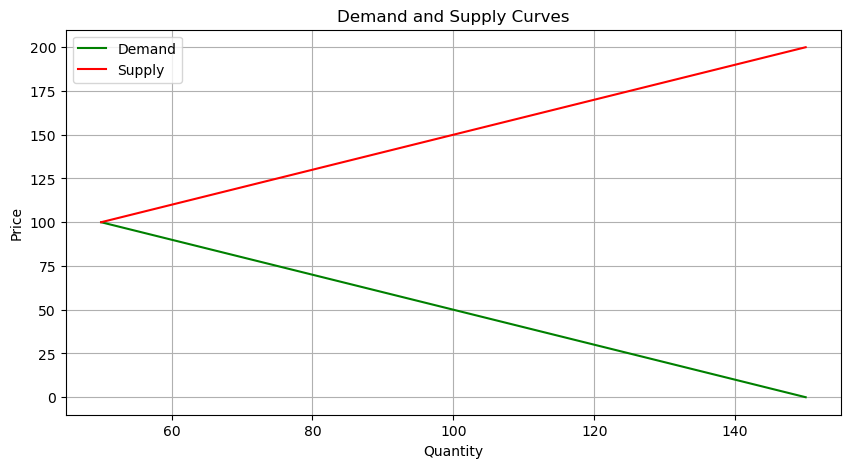

In [12]:
import os
import matplotlib.pyplot as plt

start_time = 0.0  
end_time = 600.0  


def run_balanced_market():

    trial_id = 'balanced_market'
    num_buyers = 10
    num_sellers = 10
    zic_ratio = 0.5  
    shvr_ratio = 1 - zic_ratio  

    buyers_spec = [('ZIC', int(num_buyers * zic_ratio)), ('SHVR', int(num_buyers * shvr_ratio))]
    sellers_spec = [('ZIC', int(num_sellers * zic_ratio)), ('SHVR', int(num_sellers * shvr_ratio))]
    traders_spec = {'sellers': sellers_spec, 'buyers': buyers_spec}


    range1 = (50, 150)
    supply_schedule = [{'from': start_time, 'to': end_time, 'ranges': [range1], 'stepmode': 'fixed'}]
    range2 = (50, 150)
    demand_schedule = [{'from': start_time, 'to': end_time, 'ranges': [range2], 'stepmode': 'fixed'}]
    order_interval = 15

    order_sched = {'sup': supply_schedule, 'dem': demand_schedule,
                   'interval': order_interval, 'timemode': 'drip-poisson'}

    dump_flags = {'dump_blotters': False, 'dump_lobs': False, 'dump_strats': False,
                  'dump_avgbals': False, 'dump_tape': True}


    market_session(trial_id, start_time, end_time, traders_spec, order_sched, dump_flags, False)
    
    return trial_id


def extract_data_from_tape(tape_file):
    data = []
    with open(tape_file, 'r') as file:
        for line in file:
            if line.startswith('Trd'):
                _, time, price = line.split(', ')
                data.append((float(time), float(price.strip())))
    return data


def plot_transaction_prices(prices, times):
    plt.figure(figsize=(10, 5))
    plt.plot(times, prices, marker='o', linestyle='-', color='blue')
    plt.title('Transaction Prices Over Time')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()


def plot_demand_supply_curve():
    plt.figure(figsize=(10, 5))
    quantity = list(range(50, 151))
    demand = [150 - q for q in quantity]
    supply = [50 + q for q in quantity]
    plt.plot(quantity, demand, label='Demand', linestyle='-', color='green')
    plt.plot(quantity, supply, label='Supply', linestyle='-', color='red')
    plt.title('Demand and Supply Curves')
    plt.xlabel('Quantity')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()


trial_id = run_balanced_market()


tape_file = f"{trial_id}_tape.csv"
data = extract_data_from_tape(tape_file)

times = [x[0] for x in data]
prices = [x[1] for x in data]


plot_transaction_prices(prices, times)
plot_demand_supply_curve()

The balanced market with both ZIC and SHVR agents presents a distinctive behavior pattern, combining the random trading of ZIC agents with the more calculated price adjustments of SHVR agents. This mix results in a market that exhibits both volatility and some degree of convergence, as reflected in the "Transaction Prices Over Time" graph, where prices fluctuate within a range rather than settling into a stable pattern. While SHVR agents contribute to the observed convergence by adjusting prices based on recent transactions, the randomness introduced by ZIC agents prevents smooth convergence, leading to oscillations in prices. This outcome contrasts with Vernon Smith's experiments, where human traders typically drive markets towards a stable equilibrium through learning and adaptation. The generated graphs effectively visualize these dynamics, illustrating how the interaction between different types of agents creates a market that does not align neatly with the stable outcomes observed in Smith's human-driven markets but instead reflects the complex interplay of varying trading strategies.

# A5

In [22]:
import numpy as np


def run_multiple_trials(n_trials=100):
    zic_profits = []
    shvr_profits = []
    
    for i in range(n_trials):
        trial_id = f'balanced_market_trial_{i}'
        

        num_buyers = 10
        num_sellers = 10
        zic_ratio = 0.5
        shvr_ratio = 1 - zic_ratio

        buyers_spec = [('ZIC', int(num_buyers * zic_ratio)), ('SHVR', int(num_buyers * shvr_ratio))]
        sellers_spec = [('ZIC', int(num_sellers * zic_ratio)), ('SHVR', int(num_sellers * shvr_ratio))]
        traders_spec = {'sellers': sellers_spec, 'buyers': buyers_spec}

        range1 = (50, 150)
        supply_schedule = [{'from': start_time, 'to': end_time, 'ranges': [range1], 'stepmode': 'fixed'}]
        range2 = (50, 150)
        demand_schedule = [{'from': start_time, 'to': end_time, 'ranges': [range2], 'stepmode': 'fixed'}]
        order_interval = 15

        order_sched = {'sup': supply_schedule, 'dem': demand_schedule,
                       'interval': order_interval, 'timemode': 'drip-poisson'}

        dump_flags = {'dump_blotters': True, 'dump_lobs': False, 'dump_strats': False,
                      'dump_avgbals': False, 'dump_tape': False}

        market_session(trial_id, start_time, end_time, traders_spec, order_sched, dump_flags, False)


        blotter_file = f'{trial_id}_blotter.csv'
        zic_profit, shvr_profit = parse_profits_from_blotter(blotter_file)
        zic_profits.append(zic_profit)
        shvr_profits.append(shvr_profit)
        
    return np.array(zic_profits), np.array(shvr_profits)


def parse_profits_from_blotter(blotter_file):
    zic_profit = 0.0
    shvr_profit = 0.0
    with open(blotter_file, 'r') as file:
        for line in file:
            fields = line.split(',')
            trader_id = fields[0]
            profit = float(fields[6])
            
            if trader_id.startswith('ZIC'):
                zic_profit += profit
            elif trader_id.startswith('SHVR'):
                shvr_profit += profit
                
    return zic_profit, shvr_profit

# Output

The code conducts a series of market simulation trials to collect and analyze profit data for two types of traders, ZIC and SHVR, under specific market conditions. The run_multiple_trials function, which by default runs 100 trials but can be adjusted, initializes empty lists to store profits for ZIC and SHVR traders. For each trial, a unique trial_id is generated, and the market is populated with an equal number of ZIC and SHVR traders as buyers and sellers. The buyers_spec and sellers_spec dictionaries define the ratio of trader types, while the order_sched dictionary sets up the supply and demand schedules with specified price ranges and order intervals. The simulation is run using the market_session function, which generates output controlled by the dump_flags. After each session, the parse_profits_from_blotter function reads the generated blotter file, extracts the profits for ZIC and SHVR traders, and appends these to their respective lists. Once all trials are completed, the function returns the collected profits as NumPy arrays for further analysis. This allows for statistical evaluation of the traders' performance, helping to determine which type performs better under the given market conditions or how these conditions affect profitability.